In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SMCS_df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
display(SMCS_df)


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


In [ ]:
#Since this is 2 years ago, Gen Z 18-25, Millenials 26-41, Gen X 42-57, Baby Boomers 58-76, The Silent Generation 77-94
genZ_segment = SMCS_df.loc[(SMCS_df["Age"] >= 18) & (SMCS_df["Age"] <= 25)]
millenial_segment = SMCS_df.loc[(SMCS_df["Age"] >= 26) & (SMCS_df["Age"] <= 41)]
genX_segment = SMCS_df.loc[(SMCS_df["Age"] >= 42) & (SMCS_df["Age"] <= 57)]
bboom_segment = SMCS_df.loc[(SMCS_df["Age"] >= 58) & (SMCS_df["Age"] <= 76)]
silent_segment = SMCS_df.loc[(SMCS_df["Age"] >= 77) & (SMCS_df["Age"] <= 94)]

In [ ]:
#finding the averages
generation_average_spending_scores = {
    'Gen Z': genZ_segment["Spending Score"].mean(),
    'Millenial': millenial_segment["Spending Score"].mean(),
    'Gen X': genX_segment["Spending Score"].mean(),
    'Baby Boomers': bboom_segment["Spending Score"].mean(),
    'Silent Generation': silent_segment["Spending Score"].mean()
}

#bar graph
plt.figure(figsize=(10, 9))
generation_average_spending_scores_barplot = sns.barplot(x=list(generation_average_spending_scores.keys()),y=list(generation_average_spending_scores.values()))

#annotating numbers
for i in range(len(generation_average_spending_scores)):
    generation_average_spending_scores_barplot.text(i,list(generation_average_spending_scores.values())[i] + 1,
    f'{list(generation_average_spending_scores.values())[i]:.1f}',
    ha='center',va='bottom', fontsize= 12)

plt.xlabel('Age Segments')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Age Segments')
plt.show()


In [ ]:
#What percentage does each group make up of the market?
generation_segmentation = {
    'Gen Z': len(genZ_segment),
    'Millenial': len(millenial_segment),
    'Gen X': len(genX_segment),
    'Baby Boomers': len(bboom_segment),
    'Silent Generation': len(silent_segment)
}

#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(generation_segmentation.values(),labels=generation_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution by Age Segments')
plt.show

In [ ]:
#Segmentation of generation, split again by gender
genZ_segment_male = genZ_segment.loc[genZ_segment["Gender"] == "Male"]
genZ_segment_female = genZ_segment.loc[genZ_segment["Gender"] == "Female"]
millenial_segment_male = millenial_segment.loc[millenial_segment["Gender"] == "Male"]
millenial_segment_female = millenial_segment.loc[millenial_segment["Gender"] == "Female"]
genX_segment_male = genX_segment.loc[genX_segment["Gender"] == "Male"]
genX_segment_female = genX_segment.loc[genX_segment["Gender"] == "Female"]
bboom_segment_male = bboom_segment.loc[bboom_segment["Gender"] == "Male"]
bboom_segment_female = bboom_segment.loc[bboom_segment["Gender"] == "Female"]
silent_segment_male = silent_segment.loc[silent_segment["Gender"] == "Male"]
silent_segment_female = silent_segment.loc[silent_segment["Gender"] == "Female"]


In [ ]:
#Find the size of each of these populations
generation_gender_segmentation = {
    'Gen Z, Male': len(genZ_segment_male),
    'Millenial, Male': len(millenial_segment_male),
    'Gen X, Male': len(genX_segment_male),
    'Baby Boomers, Male': len(bboom_segment_male),
    'Silent Generation, Male': len(silent_segment_male),
    'Gen Z, Female': len(genZ_segment_female),
    'Millenial, Female': len(millenial_segment_female),
    'Gen X, Female': len(genX_segment_female),
    'Baby Boomers, Female': len(bboom_segment_female),
    'Silent Generation, Female': len(silent_segment_female),
}

#Calculate percentages for two groups
total_male = sum([generation_gender_segmentation[key] for key in generation_gender_segmentation if 'Male' in key])
total_female = sum([generation_gender_segmentation[key] for key in generation_gender_segmentation if 'Female' in key])
total = total_male + total_female

male_percentage = total_male / total * 100
female_percentage = total_female / total * 100

#Color differentiation
colors_male = plt.cm.Reds(range(100, 256, 31))  
colors_female = plt.cm.Greens(range(100, 256, 31))  


colors = []
for i, key in enumerate(generation_gender_segmentation.keys()):
    if 'Male' in key:
        colors.append(colors_male[i % len(colors_male)])
    else:
        colors.append(colors_female[i % len(colors_female)])

#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(generation_gender_segmentation.values(),labels=generation_gender_segmentation.keys(),autopct='%1.1f%%', colors=colors, startangle = 140)
plt.title('Customer Distribution by Age Segments, and Gender')
plt.text(-2, -1.5, f'Total Male: {male_percentage:.1f}%\nTotal Female: {female_percentage:.1f}%', fontsize=12)
plt.show

In [ ]:
#Segmentation based on Census Bureau's Income in the United States 2022 Report:
lc = SMCS_df.loc[SMCS_df['Annual Income'] < 30000]
lmc = SMCS_df.loc[(SMCS_df['Annual Income'] > 30000) & (SMCS_df['Annual Income'] < 58020) ]
mc = SMCS_df.loc[(SMCS_df['Annual Income'] > 58020) & (SMCS_df['Annual Income'] < 94000) ]
umc = SMCS_df.loc[(SMCS_df['Annual Income'] > 94000) & (SMCS_df['Annual Income'] < 153000) ]
uc = SMCS_df.loc[SMCS_df['Annual Income'] > 153000]


In [ ]:
income_segmentation = {
    'Lower Class': len(lc),
    'Lower-Middle Clas': len(lmc),
    'Middle Class': len(mc),
    'Upper-Middle Class': len(umc),
    'Upper Class': len(uc)
}

#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(income_segmentation.values(),labels=income_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution by Income Segments')
plt.show

In [ ]:
sc1 = SMCS_df.loc[SMCS_df['Spending Score']<=25]
sc2 = SMCS_df.loc[(SMCS_df['Spending Score'] >= 26) & (SMCS_df['Spending Score']) <= 50]
sc3 = SMCS_df.loc[(SMCS_df['Spending Score'] >= 51) & (SMCS_df['Spending Score']) <= 75]
sc4 = SMCS_df.loc[(SMCS_df['Spending Score'] >= 76) & (SMCS_df['Spending Score']) <= 100]

In [ ]:
spending_score_segmentation = {
    'Low Spending Score': len(sc1),
    'Mid Low Spending Score': len(sc2),
    'Mid High Spening Score': len(sc3),
    'High Spending Score': len(sc4)
}

plt.figure(figsize=(10,6))
plt.pie(spending_score_segmentation.values(),labels=spending_score_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution by Income Segments')
plt.show

In [ ]:
high_spend_gen_z = sc4.loc[(sc4["Age"] >= 18) & (sc4["Age"] <= 25)]
high_spend_millenial = sc4.loc[(sc4["Age"] >= 26) & (sc4["Age"] <= 41)]
high_spend_gen_x = sc4.loc[(sc4["Age"] >= 42) & (sc4["Age"] <= 57)]
high_spend_bboom = sc4.loc[(sc4["Age"] >= 58) & (sc4["Age"] <= 76)]
high_spend_silent = sc4.loc[(sc4["Age"] >= 77) & (sc4["Age"] <= 94)]

In [ ]:
high_spending_generational_segmentation = {
    "Gen Z":len(high_spend_gen_z),
    "Millenial":len(high_spend_millenial),
    "Gen X":len(high_spend_gen_x),
    "Baby Boomers":len(high_spend_bboom),
    "Silent Generation":len(high_spend_silent)
}

plt.figure(figsize=(10,6))
plt.pie(high_spending_generational_segmentation.values(),labels = high_spending_generational_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution of High Spenders (Score 76-100) by Age')
plt.show

In [ ]:
high_spend_gen_z_male = high_spend_gen_z.loc[high_spend_gen_z["Gender"] == "Male"]
high_spend_gen_z_female = high_spend_gen_z.loc[high_spend_gen_z["Gender"] == "Female"]
high_spend_millenial_male = high_spend_millenial.loc[high_spend_millenial["Gender"] == "Male"]
high_spend_millenial_female = high_spend_millenial.loc[high_spend_millenial["Gender"] == "Female"]
high_spend_gen_x_male = high_spend_gen_x.loc[high_spend_gen_x["Gender"] == "Male"]
high_spend_gen_x_female = high_spend_gen_x.loc[high_spend_gen_x["Gender"] == "Female"]
high_spend_bboom_male = high_spend_bboom.loc[high_spend_bboom["Gender"] == "Male"]
high_spend_bboom_female = high_spend_bboom.loc[high_spend_bboom["Gender"] == "Female"]
high_spend_silent_male = high_spend_silent.loc[high_spend_silent["Gender"] == "Male"]
high_spend_silent_female = high_spend_silent.loc[high_spend_silent["Gender"] == "Female"]


In [ ]:
high_spending_generational_and_gender_segmentation = {
    "Gen Z Male":len(high_spend_gen_z_male),
    "Millenial Male":len(high_spend_millenial_male),
    "Gen X Male":len(high_spend_gen_x_male),
    "Baby Boomers Male":len(high_spend_bboom_male),
    "Silent Generation Male":len(high_spend_silent_male),
    "Gen Z Female":len(high_spend_gen_z_female),
    "Millenial Female":len(high_spend_millenial_female),
    "Gen X Female":len(high_spend_gen_x_female),
    "Baby Boomers Female":len(high_spend_bboom_female),
    "Silent Generation Female":len(high_spend_silent_female)
}
#filter
filtered_segmentation = {key: value for key, value in high_spending_generational_and_gender_segmentation.items() if value > 0}

#Calculate percentages for two groups
total_male = sum([filtered_segmentation[key] for key in filtered_segmentation if 'Male' in key])
total_female = sum([filtered_segmentation[key] for key in filtered_segmentation if 'Female' in key])
total = total_male + total_female

male_percentage = total_male / total * 100
female_percentage = total_female / total * 100

#Color differentiation
colors_male = plt.cm.Reds(range(100, 256, 31))  
colors_female = plt.cm.Greens(range(100, 256, 31))  

colors_male = plt.cm.Reds(range(100, 256, 31))  
colors_female = plt.cm.Greens(range(100, 256, 31))  

#change colors
colors = []
for i, key in enumerate(filtered_segmentation.keys()):
    if 'Male' in key:
        colors.append(colors_male[i % len(colors_male)])
    else:
        colors.append(colors_female[i % len(colors_female)])
        
#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(filtered_segmentation.values(),labels = filtered_segmentation.keys(),autopct='%1.1f%%', colors=colors)
plt.title('Customer Distribution of High Spenders (Score 76-100) by Age and Gender')
plt.text(-2, -1.5, f'Total Male: {male_percentage:.1f}%\nTotal Female: {female_percentage:.1f}%', fontsize=12)
plt.show

In [ ]:
#This graph is absolutely useless, thought I would try a scatteplot and see high concentrations, but this dataset is just too big
plt.figure(figsize=(10, 6))
plt.scatter(SMCS_df['Annual Income'], SMCS_df['Spending Score'], alpha=0.5, edgecolor='k')

plt.title('Correlation between Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (0-100)')
plt.grid(True)

plt.show()

In [ ]:
# Group by 'Annual Income' and calculate the mean of 'Spending Score' and then set it back to normal
income_spending_avg = SMCS_df.groupby('Annual Income')['Spending Score'].mean().reset_index()

plt.figure(figsize=(100, 20))
plt.plot(income_spending_avg['Annual Income'], income_spending_avg['Spending Score'])

plt.title('Average Spending Score by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Spending Score (0-100)')
plt.grid(True)

plt.show()



C:\Users\manch\AppData\Local\Temp\ipykernel_12320\1089570772.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_spending_avg = SMCS_df.groupby(income_bins)['Spending Score'].mean().reset_index()


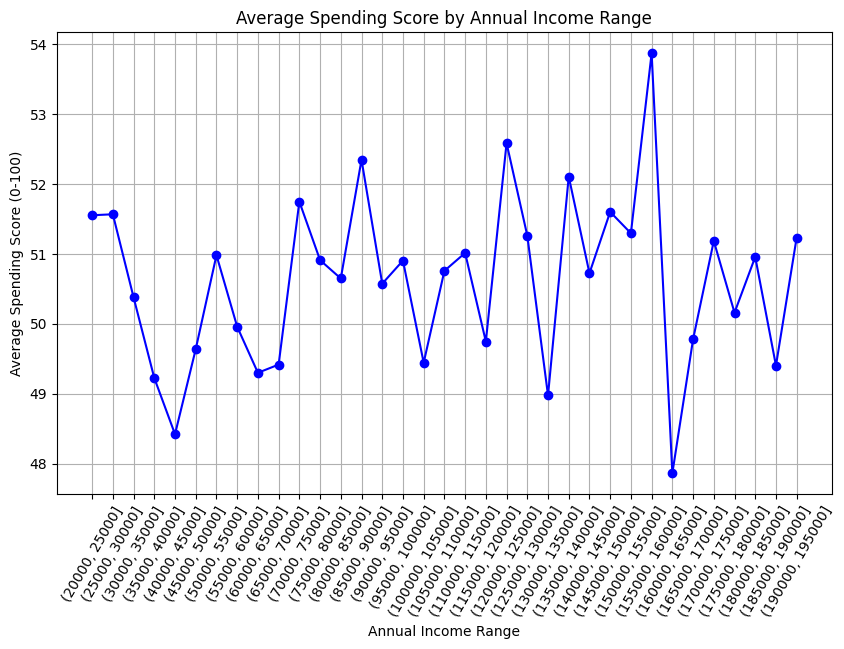

In [92]:
#Found 'pd.cut() Function to cut make so called bins'
income_bins = pd.cut(SMCS_df['Annual Income'], bins=range(20000, 200000, 5000))

income_spending_avg = SMCS_df.groupby(income_bins)['Spending Score'].mean().reset_index()
income_spending_avg.columns = ['Income Range', 'Average Spending Score']

plt.figure(figsize=(10, 6))
plt.plot(income_spending_avg['Income Range'].astype(str), income_spending_avg['Average Spending Score'], marker='o', color='b')

plt.title('Average Spending Score by Annual Income Range')
plt.xlabel('Annual Income Range')
plt.ylabel('Average Spending Score (0-100)')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.grid(True)



C:\Users\manch\AppData\Local\Temp\ipykernel_12320\3945914844.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maxed_Spending['Generation'] = Maxed_Spending['Age'].apply(categorize_generation)


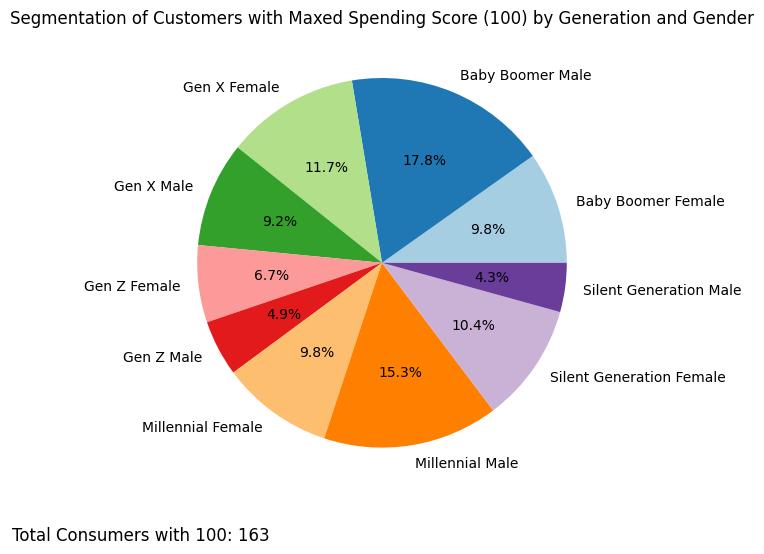

In [118]:
Maxed_Spending = SMCS_df[SMCS_df["Spending Score"] == 100]

total_100 = len(Maxed_Spending)

#I don't have to do this manually, I can make a function to sort and make a new column based on Generation, i wish i did this so much sooner
def categorize_generation(age):
    if age <= 25:
        return 'Gen Z'
    elif 26 <= age <= 41:
        return 'Millennial'
    elif 42 <= age <= 57:
        return 'Gen X'
    elif 58 <= age <= 76:
        return 'Baby Boomer'
    else:
        return 'Silent Generation'

Maxed_Spending['Generation'] = Maxed_Spending['Age'].apply(categorize_generation)

#Group By generation and gender, use ,size to count each category and set it as count
segmentation = Maxed_Spending.groupby(['Generation', 'Gender']).size().reset_index(name='Count')
#combine
segmentation['Segment'] = segmentation['Generation'] + " " + segmentation['Gender']

plt.figure(figsize=(10, 6))
#Paried color function is neat
plt.pie(segmentation['Count'], labels=segmentation['Segment'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Segmentation of Customers with Maxed Spending Score (100) by Generation and Gender')
plt.text(-2, -1.5, f'Total Consumers with 100: {total_100}', fontsize=12)
plt.show()




C:\Users\manch\AppData\Local\Temp\ipykernel_12320\1939806590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maxed_Spending['Income Category'] = pd.cut(Maxed_Spending['Annual Income'], bins=income_bins, labels=income_labels, right=False)


<function matplotlib.pyplot.show(close=None, block=None)>

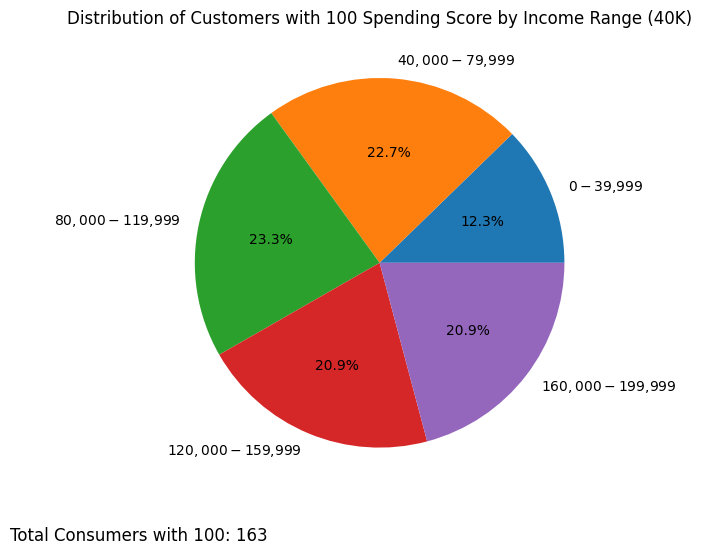

In [151]:
#Make new income bins but now it's 20k isntead of 40k    
income_bins = range(0, 200001, 40000)
#sets labels for each bin after being cut until the last one
income_labels = [f'${i:,} - ${i+39999:,}' for i in income_bins[:-1]]

#Create new column
Maxed_Spending['Income Category'] = pd.cut(Maxed_Spending['Annual Income'], bins=income_bins, labels=income_labels, right=False)

income_distribution = Maxed_Spending['Income Category'].value_counts().sort_index()

income_distribution

plt.figure(figsize=(10,6))
plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Customers with 100 Spending Score by Income Range (40K)')
plt.text(-2, -1.5, f'Total Consumers with 100: {total_100}', fontsize=12)
plt.show


In [142]:
income_distribution


Income Category
$80,000 to $119,999     38
$40,000 to $79,999      37
$120,000 to $159,999    34
$160,000 to $199,999    34
$0 to $39,999           20
Name: count, dtype: int64